In [1]:
import numpy as np 
import pandas as pd 
from IPython.display import Image
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt
import os

In [2]:
folder_path = "./scratch"
train_csv = f"{folder_path}/train.csv"
# train_csv = '/kaggle/input/ai-vs-human-generated-dataset/train.csv'
train = pd.read_csv(train_csv)

In [3]:
train.head() 

,Unnamed: 0,file_name,label
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1


In [4]:
# Check missing values in each column
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]

print(f'There are {len(missing_values)} missing values')

There are 0 missing values


In [5]:
# Check the occurances of label 0 and 1
label_counts=train['label'].value_counts()
print(label_counts)

label
1    39975
0    39975
Name: count, dtype: int64


In [6]:
# Check if all filenames end with ".jpg"
all_jpg = train["file_name"].str.endswith(".jpg").all()

if all_jpg:
    print("All filenames end with .jpg")

All filenames end with .jpg


In [7]:
#rename the file name to include the path and the file name
train["file_name"] = "/kaggle/input/ai-vs-human-generated-dataset/train_data/" + train["file_name"].str.split("/").str[-1]

'label : 1'

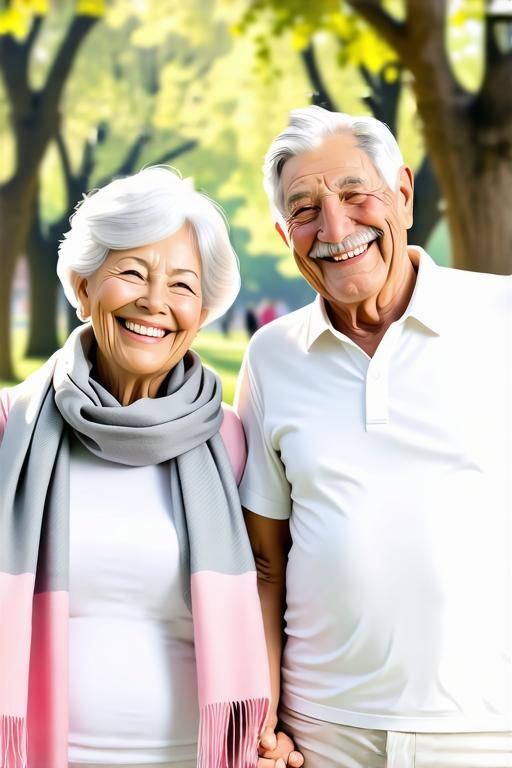

'label : 0'

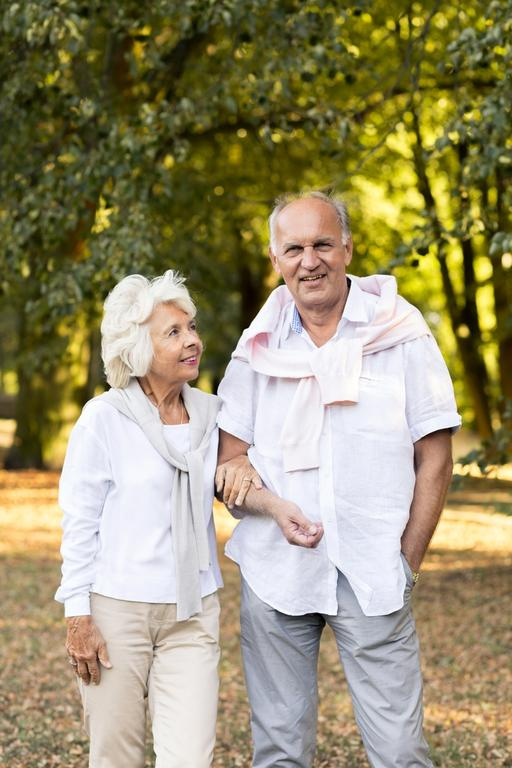

In [8]:
# Check the sample of AI generated images(label1) and Real Images(label0)
file_names = [fname for fname in train["file_name"]]
from IPython.display import Image
display(f'label : {train["label"][0]}')
display(Image(file_names[0]))
display(f'label : {train["label"][1]}')
display(Image(file_names[1]))

In [9]:
# Split into train (80%) and test (20%)
train_df, test_df = train_test_split(train, test_size=0.2, random_state=42, stratify=train['label'])

# Split train into actual train (60%) and validation (20%) 
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df['label'])  

# Check dataset sizes
print(f"Train Size: {len(train_df)}")
print(f"Validation Size: {len(val_df)}")
print(f"Test Size: {len(test_df)}")


Train Size: 47970
Validation Size: 15990
Test Size: 15990


In [10]:
# get image size
from PIL import Image
# def get_image_size(file_path):
#     with Image.open(file_path) as img:
#         return img.size  # (width, height)

# # Get sizes for all images
# image_sizes = [get_image_size(fname) for fname in train_df["file_name"]]

# # Convert to DataFrame and show summary
# size_df = pd.DataFrame(image_sizes, columns=["Width", "Height"])
# print(size_df.describe())

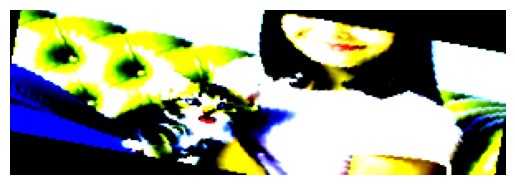

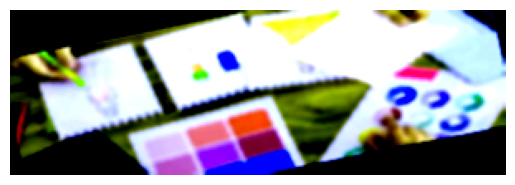

In [22]:
# Transformation (Resize + Normalize + Data Augmentation)
transform = transforms.Compose([
    transforms.Resize((112, 320)),  # Resize image into smallest size
    transforms.RandomCrop((100, 300)),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Custom Dataset Class
class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            img = Image.open(img_path).convert("RGB")  # Ensure RGB format
            if self.transform:
                img = self.transform(img)  # Resize + Normalize
            return img
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None

# Create Dataset and DataLoader
image_paths = train_df["file_name"].tolist()  
dataset = ImageDataset(image_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)

# Show two normalized images
for batch in dataloader:
    first_two_images = batch[:2]  # Get first two images

    for img_tensor in first_two_images:
        plt.imshow(img_tensor.permute(1, 2, 0)) 
        plt.axis('off')  
        plt.show()
    break 